# Econ433 project 2: Visualize safegraph datasets

By Michael T Kissiedu

Professor: Dr. Jin

Teaching Assitant: Ziqiao

Due date: Friday Feb 12th, 2021

In [1]:
%matplotlib notebook
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.2f}'.format
import matplotlib.ticker as ticker
import seaborn as sns
from matplotlib import dates as mpl_dates
import mpl_toolkits.axes_grid1.inset_locator as mpl_il

In [2]:
wlong = pd.read_csv('wlong_raw.csv')
wlong.head()

,id,Rank,date_range_start,date_range_end,visits_by_day,region,raw_visitor_counts,raw_visit_counts,safegraph_place_id,daily_visits,dayname,date,positive_visits,weekend
0,466,1,2020-03-09,2020-03-16,"11,5,1,2,1,7,7",WY,19.00,34.00,sg:0e5816c2c3074793ae5fc6f9c3e6bb7e,11.00,Mon,2020-03-09,1,0
1,552,1,2020-03-09,2020-03-16,"13,13,13,5,13,2,11",WY,41.00,70.00,sg:111ac71acaee4d10b00ef01388ae3e98,13.00,Mon,2020-03-09,1,0
2,1399,1,2020-03-09,2020-03-16,"10,4,4,6,4,0,0",WY,13.00,28.00,sg:2a17146a35e149dabce27332a52f8d1f,10.00,Mon,2020-03-09,1,0
3,2694,1,2020-03-09,2020-03-16,"5,8,5,4,14,8,5",WY,44.00,49.00,sg:5380bbb5685d4e6eb8427f4b1d418772,5.00,Mon,2020-03-09,1,0
4,2752,1,2020-03-09,2020-03-16,"0,1,0,0,2,0,0",WY,2.00,3.00,sg:55dbc9ae0c514561b30d27f7b7d74710,0.00,Mon,2020-03-09,0,0


In [3]:
wlong['date'] = pd.to_datetime(wlong['date'])
wlong['daily_visits'] = wlong['daily_visits'].astype('int')

# Part 1: Use Histograms to describe Daily Visits

Question 1a states, describe the variable “dailyvisits”. How many observations do you have? What are the minimum, maximum, average, and median of this variable? How many observations have dailyvisits equal to zero? How many observations have dailyvisits above 100 (including 100)? How many observations have dailyvisits above 1000 (including 1000)?

In [4]:
wlong['daily_visits'].describe()

count   240296.00
mean         3.81
std         11.06
min          0.00
25%          0.00
50%          1.00
75%          4.00
max        675.00
Name: daily_visits, dtype: float64

In [5]:
zeroed_dailyvisits = wlong[wlong['daily_visits'] == 0]

In [6]:
len(zeroed_dailyvisits)

81091

In [7]:
hnd_or_more = wlong[wlong['daily_visits'] >= 100]

In [8]:
len(hnd_or_more)

725

In [9]:
# Daily visita observations greater than or equal to 1000

ths_or_more = wlong[wlong['daily_visits'] >= 1000]
len(ths_or_more)

0

In [10]:
len(wlong[wlong['daily_visits'] > 50])

1822

Relating to question 1a, 240,296 observations are in the? 0 is the minimum, 675 is the maximum, 3.81 is the average, and 1 is the median of this variable daily visits. 81,091 observations have dailyvisits equal to zero. 725 observations have dailyvisits above 100 (including 100). 0 observations have dailyvisits above 1000 (including 1000)?

Question 1b states, draw a histogram of “dailyvisits” for the whole sample. On the horizontal axis, mark clearly what range of dailyvisits each bin corresponds to. Explain why you choose such bin definitions. (Hint: given the skewness of the distribution of dailyvisits in Question 1a, you may want the whole histogram to focus on a sub-range of dailyvisits, e.g. 0-50. If you decide to do so, explain why you choose this sub-range.)

In [11]:
# Generate histogram
a = np.clip(wlong['daily_visits'], 0, 50, out = None)

(array([1.57082e+05, 3.27400e+04, 2.25600e+04, 7.81800e+03, 6.73800e+03,
        2.74700e+03, 2.69500e+03, 1.21700e+03, 1.32500e+03, 6.07000e+02,
        7.39000e+02, 3.87000e+02, 4.86000e+02, 2.27000e+02, 3.00000e+02,
        1.57000e+02, 2.14000e+02, 1.13000e+02, 1.75000e+02, 1.96900e+03]),
 array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5, 25. ,
        27.5, 30. , 32.5, 35. , 37.5, 40. , 42.5, 45. , 47.5, 50. ]),
 <BarContainer object of 20 artists>)

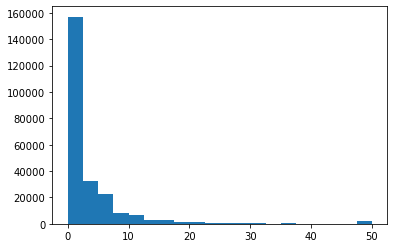

In [12]:
plt.hist(a, bins = 20, range = [0,50])

Relating to question 1b, a histogram of “dailyvisits” for the whole sample is displayed aboved in line 12. 20 bins assisted with the right skewed data.

Question 1c states using the same bin definition as in Question 1b, draw another histogram of “dailyvisits” for all weekdays as one group and all weekend days as another group. For clear comparison, you should use one color for the weekday group, and another color for the weekend group. The two sets of bars should appear in the same picture. Comment on at least one difference between the distribution of “dailyvisits” in weekdays and weekends.

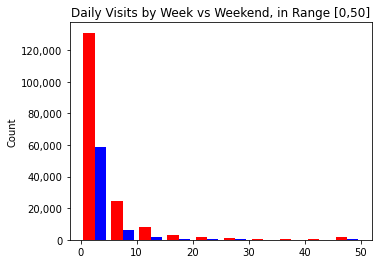

In [13]:
wkday = wlong.loc[wlong['weekend'] == 0]
wkend = wlong.loc[wlong['weekend'] == 1]
plt.figure()
b = np.clip(wkday['daily_visits'], 0, 50, out = None)
c = np.clip(wkend['daily_visits'], 0, 50, out = None)
plt.hist([b, c],
        range = [0,50],
        color = ['red', 'blue'], label = ["Weekday", "Weekend"])
plt.subplots_adjust(left = 0.2)
plt.ylabel('Count')
plt.title('Daily Visits by Week vs Weekend, in Range [0,50]')
plt.ticklabel_format(style = 'plain')
plt.gca().yaxis.set_major_formatter(
ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

* Weekday are marked red

* Weekends are marked blue.

Relating to question 1c, the above in line 13 shows another histogram of “dailyvisits” for all weekdays as one group and all weekend days as another group. One difference between the distribution of “dailyvisits” in weekdays and weekends is that the biggest bin is a lot more times bigger than the smallest bin.

# Part 2: Pie Chart of Total Visits by Day of Week

Question 2a states, calculate the sum of dailyvisits by Monday, Tuesday, Wednesday, Thursday, Friday, Saturday and Sunday in a table.

In [14]:
dv_sum = wlong[['dayname', 'daily_visits']].groupby('dayname').sum()
dv_sum

,daily_visits
dayname,
Fri,136210
Mon,149476
Sat,105016
Sun,91294
Thur,136072
Tue,147301
Wed,148993


The table above in line displays the sum of dailyvisits by Monday, Tuesday, Wednesday, Thursday, Friday, Saturday and Sunday. The table answers question 2a.

Question 2b states, draw a pie chart of total dailyvisits across the seven days of week. Each day of week should appear as a slice in this pie chart, with a different color. Mark % of total dailyvisits in each slice (or right next to each slice if some slices are too small). By definition, these percentages should add up to 100%.

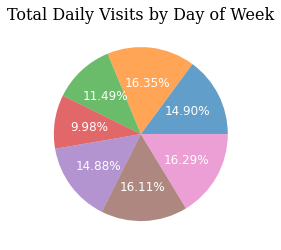

In [15]:
plt.figure()

plt.pie(dv_sum['daily_visits'], labels = dv_sum.index, autopct='%.2f%%', 
        textprops={'color':'w', 'fontsize': 12}, wedgeprops={'alpha':0.7})
plt.title('Total Daily Visits by Day of Week', fontsize = 16, fontname = 'serif');

The pie chart above in line 15, displays the percentage of total daily visits across the seven days of the week. It answers question 2b.

* 14.9 percent of total daily visits is on Friday.

* 11.49 percent of total daily visits is on Saturday.

* 9.98 percent of total daily visits is on Sunday.

* 16.35 percent of total daily visits is on Monday.

* 16.11 percent of total daily visits is on Tuesday.

* 16.29 percent of total daily visits is on Wednesday.

* 14.88 percent of total daily visits is on Thursday.

# Part 3: Bar Chart of Average Daily Visits by Day of Week

Question 3a states, calculate average dailyvisits of Monday, Tuesday, Wednesday, Thursday, Friday, Saturday and Sunday. Show the results in a table. 

In [16]:
dayname = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']

wlong['dayname2'] = wlong['dayname'].replace([1,2,3,4,5,6,7], dayname)
                
wlong['dayname2'] = pd.Categorical(wlong['dayname2'], ordered = True, categories=dayname)

In [17]:
dv_avg = wlong[['dayname2', 'daily_visits']].groupby('dayname2').mean()

In [18]:
dv_avg.reset_index(inplace = True)

In [19]:
dv_avg

,dayname2,daily_visits
0,Mon,4.35
1,Tue,4.29
2,Wed,4.34
3,Thur,3.96
4,Fri,3.97
5,Sat,3.06
6,Sun,2.66


The table above in line 19 displays average daily visits of Monday, Tuesday, Wednesday, Thursday, Friday, Saturday and Sunday. It answer question 3a.

Question 3b states, draw average dailyvisits in a bar chart, where the horizontal axis is Monday, Tuesday, Wednesday, Thursday, 

Friday, Saturday and Sunday, and the vertical axis is average dailyvisits in each day of week. On top of each bar, report the 

value of average dailyvisits for that bar (up to 1 decimal point). Hint: these values should be the same as in your answer to 

Question 3a, except for rounding error.

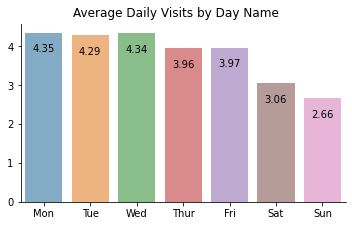

In [20]:
ax = sns.catplot(
    data = dv_avg, kind='bar',
    x = 'dayname2', y = 'daily_visits',
    alpha = .6)
ax.set_axis_labels("", "")
ax.fig.suptitle("Average Daily Visits by Day Name", fontsize=12);
plt.gcf().set_size_inches(5,3)

# adding number to top of each bar
for index, row in dv_avg.iterrows():
    ax.ax.text(row.name,
        row['daily_visits']-0.5, round(row['daily_visits'], 2),
               color='black',ha="center")

# title too close to the highest bar. Shrinking height of the subplot by 10%.
plt.subplots_adjust(top=0.9)

The bar graph above in line 20, displays average daily visits by day name. It answers question 3b.

Question 3c states, draw another bar chart of average dailyvisits, with Monday, Tuesday, Wednesday, Thursday, Friday, Saturday and Sunday on the horizontal axis as in Question 3b.  But in this bar chart, you plot two sets of bars, one set includes all days up to March 13, 2020 (including March 13); the other set includes all days after March 13, 2020. (March 13 is the day that US announced national emergency because of COVID). The two sets of bars should use different colors for clear comparison. Comment on at least two differences between the two sets in the bar chart.

In [21]:
wlong['date'] = pd.to_datetime(wlong['date'], infer_datetime_format = True)

In [22]:
rona_date = pd.to_datetime('2020-03-13', infer_datetime_format = True)

In [23]:
wlong['post_rona'] = np.where(wlong['date'] > rona_date, 1,0)

In [24]:
day_covid = wlong[['daily_visits', 'dayname2', 'post_rona']].groupby(['dayname2', 'post_rona']).mean()

In [25]:
day_covid.reset_index(inplace = True)

In [26]:
day_covid

,dayname2,post_rona,daily_visits
0,Mon,0,5.69
1,Mon,1,3.90
2,Tue,0,5.66
3,Tue,1,3.82
4,Wed,0,5.80
5,Wed,1,3.84
6,Thur,0,5.82
7,Thur,1,3.32
8,Fri,0,6.00
9,Fri,1,3.27


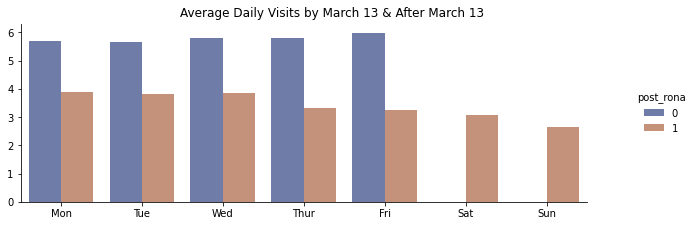

In [27]:
ax = sns.catplot(
    data = day_covid, kind = 'bar',
    x = 'dayname2', y = 'daily_visits', hue = 'post_rona', palette = 'dark', alpha = .6)
ax.set_axis_labels("","")
ax.fig.suptitle('Average Daily Visits by March 13 & After March 13', fontsize = 12)
plt.gcf().set_size_inches(10,3)

# title too close to the highest bar. Shrinking height of the subplot by 10%.
plt.subplots_adjust(top=0.9)

The bar graph above in line 27, shows in blue all days up to March 13, 2020 (including March 13); the other set includes all days after March 13, 2020. (March 13 is the day that US announced national emergency because of COVID). It answers question 3c.

# Part 4: Line Chart of Daily Visits by Date

Question 4a states, calculate average dailyvisits by date.  Show the results in a table. (Hint: you should have 28 rows in this table corresponding to the 28 unique dates in the data.)

In [28]:
def q25(x):
    return x.quantile(0.25)
def median(x):
    return x.quantile(0.50)

def q75(x):
    return x.quantile(0.75)

avg_by_date = wlong.groupby('date').agg({'daily_visits': [q25, median, q75, np.mean], 'dayname': 'first', 'weekend':'first'})

avg_by_date.columns = [f"{x}_{y}" for x, y in avg_by_date.columns.to_flat_index()]

avg_by_date

,daily_visits_q25,daily_visits_median,daily_visits_q75,daily_visits_mean,dayname_first,weekend_first
date,,,,,,
2020-03-09,0,2,6,5.69,Mon,0
2020-03-10,1,2,6,5.66,Tue,0
2020-03-11,1,2,6,5.80,Wed,0
2020-03-12,1,2,6,5.82,Thur,0
2020-03-13,1,2,6,6.00,Fri,0
2020-03-14,0,1,4,4.32,Sat,1
2020-03-15,0,1,3,3.45,Sun,1
2020-03-16,0,2,5,4.50,Mon,0
2020-03-17,1,2,5,4.43,Tue,0


The table above in line 29 shows the average dailyvisits by date. It answers question 4a.

Question 4b states, draw average dailyvisits in a line chart, where the horizontal axis is date, and the vertical axis is average dailyvisits in each day. Add a vertical line for each Monday (in black) and a vertical line for March 13, 2020 (in red).

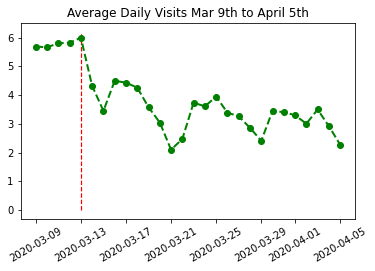

In [29]:
plt.figure()

plt.plot(avg_by_date['daily_visits_mean'], 'ko--', color = 'g', linewidth = 2)

plt.title("Average Daily Visits Mar 9th to April 5th")

plt.xticks(rotation=30)

plt.subplots_adjust(bottom=0.2)

#Vertical lines for Mon is written below

monday = avg_by_date[avg_by_date['dayname_first'] == 1].index.tolist()

plt.vlines(x = monday,
          ymin = 0, ymax = plt.ylim()[1],
          linestyle = '--', color = 'black', lw = 0.7);
# vertical lines for Covid day

plt.vlines(x = '2020-03-13', ymin = 0, ymax = plt.ylim()[1],
          linestyle = '--', color = 'r', lw = 1.2)


Relating to 4b, the graph above in line 30 shows average daily visits in a line chart. A vertical line for each Monday is in black. And a red vertical line is shown for March 13th. 

Question 4c states, draw another line chart where the horizontal axis is date. This chart should contain four lines: (1) average dailyvisits; (2) median dailyvisits; (3) 25th percentile of dailyvisits, and (4) 75th percentile of dailyvisits. Use different colors or line patterns to make sure that readers know which line is for which metric. Shade the area between the 25th and 75th percentile lines in grey.  Also include a vertical line for each Monday (in black) and a vertical line for March 13, 2020 (in red). Make at least two comments about the visual pattern of dailyvisits in this chart.

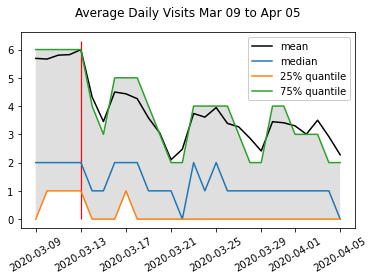

In [30]:
plt.figure()
plt.plot(avg_by_date['daily_visits_mean'], '-0', label = 'mean')
plt.plot(avg_by_date['daily_visits_median'], '-', label = 'median')
plt.plot(avg_by_date['daily_visits_q25'], '-', label = '25% quantile')
plt.plot(avg_by_date['daily_visits_q75'], '-', label = '75% quantile')
plt.xticks(rotation=30)
plt.subplots_adjust(bottom = .2)
plt.legend(loc = 1, facecolor = 'white', framealpha = 1)
plt.title('Average Daily Visits Mar 09 to Apr 05', y = 1.05);
plt.gca().fill_between(avg_by_date.index, avg_by_date['daily_visits_q25'],
                      avg_by_date['daily_visits_q75'], facecolor = 'grey',
                      alpha = 0.25);
monday = avg_by_date[avg_by_date['dayname_first'] == 1].index.tolist()
plt.vlines(x = monday,
          ymin = 0, ymax = plt.ylim()[1],
          linestyle = '--', color = 'black', lw = 0.7);
plt.vlines(x = '2020-03-13', ymin = 0, ymax = plt.ylim()[1],
          linestyle = '-', color = 'r', lw = 1.2)

Relating to question 4c, the above chart in line 32 contains four lines: (1) average dailyvisits; (2) median dailyvisits; (3) 25th percentile of dailyvisits, and (4) 75th percentile of dailyvisits.

# Part 5: Box Plot of Daily Visits by Date

Question 5 states draw a box plot of dailyvisits by week. The horizontal axis should be four weeks in your data – mark them as week1, week2, week3, week4 (with a week defined as Monday to Sunday). The chart should show one box (with whiskers) per week, so we have four boxes in the chart. Make at least one comment about the visual pattern of dailyvisits in this chart, and another comment on the comparison of this chart and the line chart you have produced in Question 4c.

In [31]:
small = wlong[wlong['daily_visits'] <= 20]

In [32]:
week1 = small.loc[small['date_range_start'] == '2020-03-09']

In [33]:
week2 = small.loc[small['date_range_start'] == '2020-03-16']

In [34]:
week3 = small.loc[small['date_range_start'] == '2020-03-23']

In [35]:
week4 = small.loc[small['date_range_start'] == '2020-03-30']

In [36]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

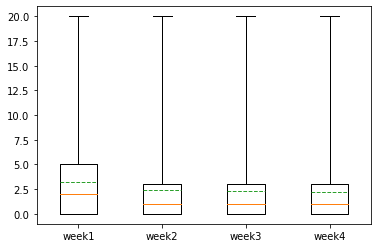

In [37]:
plt.boxplot([week1['daily_visits'], week2['daily_visits'], week3['daily_visits'], week4['daily_visits']],
            labels = ['week1', 'week2', 'week3', 'week4'],
           whis = [0,100],
           meanline = True, showmeans = True);

Relating to question 5, the box plot above shows dailyvisits by week. The horizontal axis shows four weeks in the data. They are marked as week1, week2, week3, week4 (with a week defined as Monday to Sunday). The chart shows one box (with whiskers) per week, so I have four boxes in the chart. 

Week 1 has the greatest interquartile range of the 4 weeks. Also, The line plot from 4c does not make it obvious that the IQR's between week 2 and 3 are close.